In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.10.1'

In [3]:
tf.config.list_physical_devices('GPU')
#-------------- gpu/cpu -------------
# With GPU -> 2min,50sec(5 epochs) 
# With CPU -> 2min,55sec(5 epochs) 
#------------------------------------
# With GPU -> 3min,53sec(10 epochs) 
# With CPU -> 6min,49sec(10 epochs) 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### Preprocessin the Training set

In [4]:
# for avoid overtraining of model on training dataset
# transformation like zoom,filp etc
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

In [5]:
training_set = train_datagen.flow_from_directory('dog-cat/dataset/training_set/',target_size=(64,64),batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
test_set = test_datagen.flow_from_directory('dog-cat/dataset/test_set/',target_size=(64,64),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


#### Building CNN network 

In [8]:
cnn = tf.keras.models.Sequential()

##### 1. Convolution layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu', input_shape=[64,64,3]))

##### 2. Pooling

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

##### 3. Adding second layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


##### 4. Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

#### Full connection

In [13]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

#### output layer

In [14]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

#### Training CNN

In [15]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
hist = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 24s 78ms/step - loss: 0.6653 - accuracy: 0.5989 - val_loss: 0.6391 - val_accuracy: 0.6320
Epoch 2/25
250/250 [==============================] - 18s 72ms/step - loss: 0.6074 - accuracy: 0.6711 - val_loss: 0.6475 - val_accuracy: 0.6575
Epoch 3/25
250/250 [==============================] - 18s 73ms/step - loss: 0.5577 - accuracy: 0.7050 - val_loss: 0.5204 - val_accuracy: 0.7495
Epoch 4/25
250/250 [==============================] - 18s 73ms/step - loss: 0.5251 - accuracy: 0.7368 - val_loss: 0.5314 - val_accuracy: 0.7335
Epoch 5/25
250/250 [==============================] - 18s 72ms/step - loss: 0.4994 - accuracy: 0.7599 - val_loss: 0.4993 - val_accuracy: 0.7540
Epoch 6/25
250/250 [==============================] - 19s 74ms/step - loss: 0.4798 - accuracy: 0.7660 - val_loss: 0.4780 - val_accuracy: 0.7650
Epoch 7/25
250/250 [==============================] - 18s 73ms/step - loss: 0.4675 - accuracy: 0.7790 - val_loss: 0.4562 - val_accuracy:

In [17]:
cnn.save('train_models/dog_cat.keras')

In [18]:
test_image = tf.keras.utils.load_img('dog-cat/dataset/single_test/dog_or_cat.5.jpg',target_size=(64,64)) # 1,3
test_image = tf.keras.utils.img_to_array(test_image)

In [19]:
input_arr = np.array([test_image]) # converting into batches
result = cnn.predict(input_arr) # making singal prediction 
# print(training_set.class_indices)
# print(result[0][0])
# result = float(result[0])
# print(f"This image is {100 * (1 - result):.2f}% cat and {100 * result:.2f}% dog.")

1/1 [==============================] - 0s 335ms/step


In [20]:
if result[0][0] == 1:
    print("DOG!!")
else :
    print("CAT!!")

CAT!!


In [21]:
print(hist)

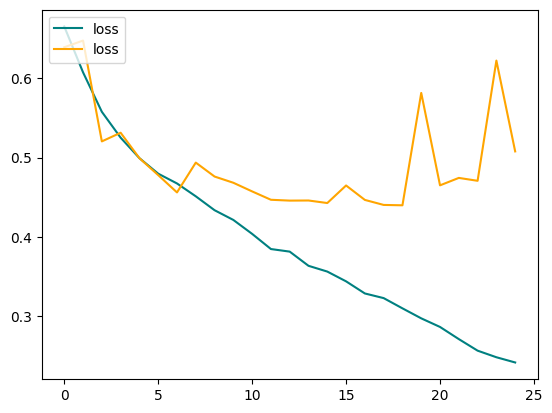

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='loss')
plt.legend(loc='upper left')
plt.show()

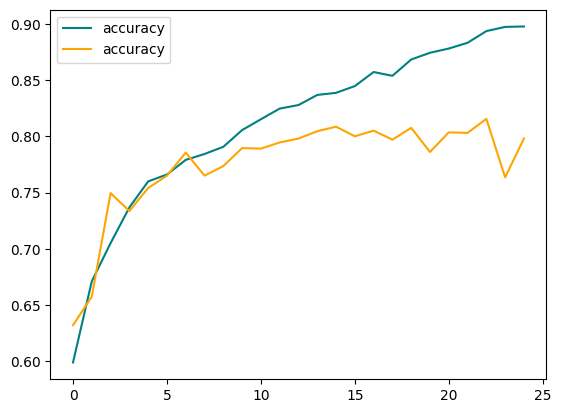

In [23]:
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='accuracy')
plt.legend(loc='upper left')
plt.show()